# Práctica Guiada  de Laboratorio 9 - Curso IA 2025-1 Grupo 1 EPISW
# Implementación de Máquinas de Vectores de Soporte para Clasificación

# Introducción
En la presente práctica, a realizarse el 12 de Junio del 2025, se abordará el problema denominado “Clasificación de Iris (tipos de la flor Iris)” mediante el algoritmo denominado `Máquinas de vectores de soporte (SVM)` del área de la IA denominada  `Machine Learning`. Luego de la presentación del problema, se entrenarán modelos de SVM para "aprender a clasificar" los tipos de la flor llamada Iris; enseguida, se evaluarán dichos modelos sobre un conjunto de datos de validación, y se elegirá el que ofrezca mejores métricas de evaluación para elaborar nuestro modelo predictivo. Finalmente, se plantean un par de ejercicios referidos a la aplicación de otros algoritmos al mismo problema.

En esa actividades se usará la biblioteca de aprendizaje automático para el lenguaje de programación Python llamada  [scikit-learn](https://scikit-learn.org/stable/).

Las principales actividades a desarrollar en esta práctica son:
* Instalación de la biblioteca llamada scikit-learn.
* Construcción de modelos basados en SVM mediante `scikit-learn`.
* Entrenamiento de los modelos.
* Validación de los modelos.
* Evaluación de los modelos
* Selección del mejor modelo.

Luego de realizar estas actividades  se plantearán algunas preguntas que los alumnos deberán resolver en grupos de hasta 4 alumnos.

# Objetivos
Los objetivos de esta Práctica son:
- Conocer la herramienta llamada `scikit-learn`.
- Conocer la técnica de Machine Learning denominada SVM.
- Aprender las etapas del procesamiento de una data: entrenamiento/validación.
- Obtener el mejor modelo que resuelva el problema planteado llamado "Clasificación de Iris".

# scikit-learn

## Introducción al scikit-learn

[scikit-learn](https://scikit-learn.org/stable/) es una de las herramientas computacionales más populares y usadas en Machine Learning. Incluye algoritmos para abordar problemas de clasificación, regresión y clustering; asimismo, para otras tareas relacionadas, tales como, reducción de dimensionalidad, preprocesamiento del dataset, entre otras.

Para esta PGL se debrá instalar previamente, para luego ser usada en la resolución de un ejercicio.

## Instalación del scikit-learn

Instalar el scikit-learn siguiendo lo indicado en [Installing the latest release](https://scikit-learn.org/stable/install.html#install-official-release).

Se puede usar el sistema de gestión de paquetes llamado `pip` o el `conda`. Se recomienda usar el segundo de los nombrados.

# Clasificación de Iris
## Planteamiento del problema
Se trata de la clasificación del dataset Iris, un problema bastante conocido en esta área utilizado para demostrar y comparar algoritmos de clasificación. Contiene medidas de longitud y ancho de pétalos y sépalos de 150 flores pertenecientes a tres especies de la flor llamada Iris: Iris setosa, Iris versicolor e Iris virginica.  El dataset es muy práctico porque tiene un tamaño muy manejable (4 atributos y 150 filas), los atributos son numéricos, no es preciso hacer ningún cambio de escala o de unidades, y permite una aproximación sencilla (como problema de clasificación), y otra más avanzada (como problema clasificación multi-clase).


## Solución del problema ejm
Los pasos que vamos a dar para resolver este problema son los siguientes:  

1.	Carga de los datos y módulos/bibliotecas necesarias para este ejemplo.
2.	Exploración de los datos.
3.  Creación y Entrenamiento del modelo
4.  Aplicación del modelo para hacer predicciones a partir de lo "aprendido"

### Carga de los módulos/bibliotecas y la data
Hay una gran variedad de bibliotecas (librerías) que tenemos disponibles y en cada una de ellas, a su vez, hay módulos distintos.  Pero para poder utilizar, tanto las librerías como los módulos,  hay que importarlos explícitamente (salvo la librería estándar). Para el problema ejemplo importaremos unos módulos que necesitamos para este experimento en particular.

In [ ]:
#Carga de módulos y bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
%matplotlib inline

A continuación, se cargará la data. Se puede descargar el csv del dataset al directorio de trabajo y sustituir la URL por el nombre del archivo local.  



In [ ]:
dataset = pd.read_csv("IRIS.csv")

In [ ]:
# Checking the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Alternativamente, se podrá descargar directamente desde el repositorio de [Machine Learning UCI](https://archive.ics.uci.edu/ml/about.html). Para ello se usará la librería `pandas`, que se acaba de cargar, y que también será útil para el análisis exploratorio de los datos, porque dispone de herramientas de visualización de datos y de estadística descriptiva. Tan sólo se requiere conocer la URL del dataset y especificar los nombres de cada columna al cargar los datos (‘sepal-length’, ‘sepal-width’, ‘petal-length’, ‘petal-width’, ‘class’). El sgte código permite cargar los datos:

In [ ]:
# Webpage URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define the column names
col_names = ["sepal_length_in_cm",
            "sepal_width_in_cm",
            "petal_length_in_cm",
            "petal_width_in_cm",
            "class"]

# Read data from URL
iris_data = pd.read_csv(url, names=col_names)

iris_data.head()

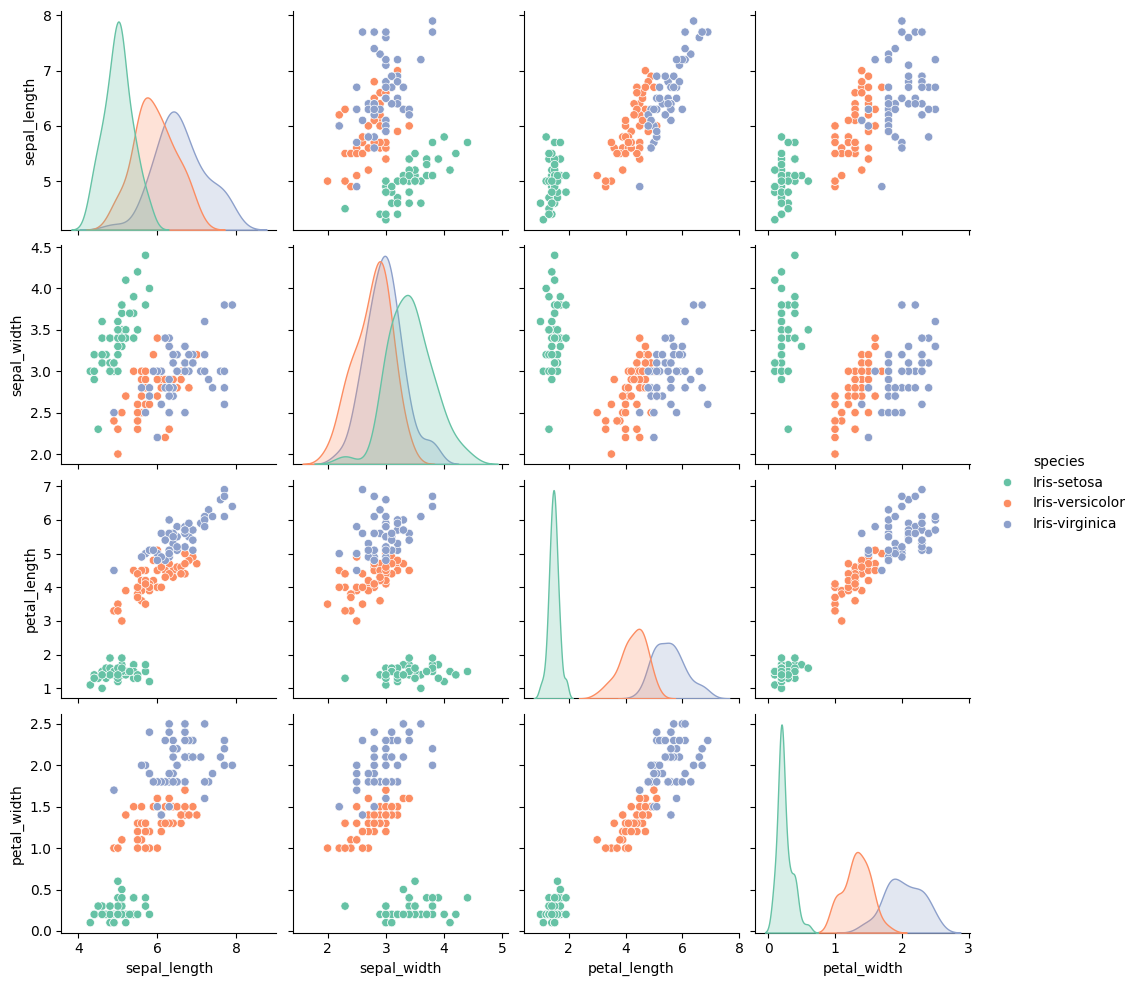

In [ ]:
# Creating a pairplot to visualize the similarities and especially difference between the species
sns.pairplot(data=dataset,  hue='species', palette='Set2')

### Exploración de los datos
En esta etapa se analizarán las características de los datos, tales como su dimensión, qué aspecto tienen, se hará también un pequeño análisis estadístico de sus atributos y se les agrupará por clases. Cada una de estas acciones implica la ejecución  de un solo comando que, además se podrá reutilizar en proyectos futuros. En particular, se usará la función `shape`, que proporcionará las dimensiones del dataset, la función `head`, que mostrará los datos (se le puede indicar incluso el número de registros que se desea, muestre), y la función `describe`, que dará valores estadísticos sobre el dataset.

Se recomienda ir probando uno a uno cada uno de los comandos que se presentarán en el código mostrado a continuación.

In [ ]:
# Dimensiones del dataset
print(dataset.shape)

# Muestra los 20 primeros
print(dataset.head(20))

#Descripción del dataset
print(dataset.describe())

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

Aunque solamente se muestra la lista de los 20 primeros registros, se puede observar que este dataset tiene 150 instancias con 5 atributos: longitud y anchura de los pétalos y sépalos de la flor, y la clase; dichos registros corresponden, en este caso, al tipo  Iris-setosa. En la parte final se muestran el número de registros que hay en el dataset, la media, la desviación estándar, los valores máximo y mínimo de cada atributo y algunos porcentajes.

A continuación, se visualizarán los datos. Se pueden realizar gráficos de una variable, que ayudarán a entender mejor cada atributo individual, o gráficos multivariable, que permiten analizar las relaciones entre atributos. En nuestro caso se va a crear un **histograma** de cada atributo o variable para hacernos una idea de qué tipo de distribución siguen. Para ello, agregue en el Jupyther Notebook los siguientes comandos.

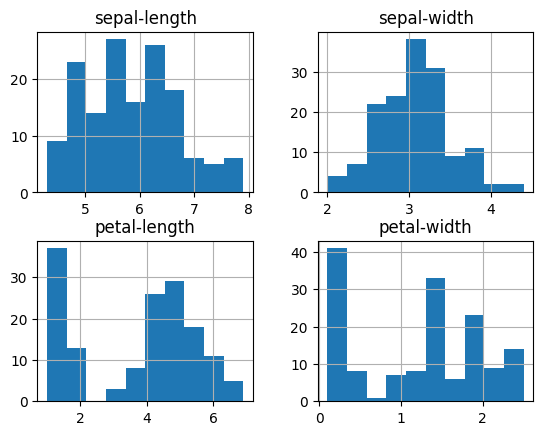

In [ ]:
# histogramas
dataset.hist()
plt.show()

A primera vista, se puede obervar que las variables relacionadas con los sépalos, parecen seguir una distribución Gaussiana. Esto es muy útil porque podemos usar algoritmos que saquen partido de las propiedades de este grupo de distribuciones.

### Separación en conjuntos de datos para Entrenamiento/Prueba
Sabemos que debemos entrenar las técnicas de modo que aprendan a clasificar los tipos de flores. Ello permitirá obtener los modelos respectivos. Allí surgirá una pregunta: ¿Cómo saber si nuestro modelo es bueno?. Para resolver esto vamos a usar las métricas vistas en una sesión anterior, relacionadas a la Matriz de Confusión.  Dichas métricas permiten evaluar la «calidad» de un modelo basado en Machine Learning.

Con esa finalidad se separa la data en un conjunto de datos para el entrenamiento y en un segundo conjunto con datos para la validación, es decir, para probar los modelos; para ello, reservaremos un 30% de los datos del dataset original. Así, aplicándolo a este conjunto de validación, podremos comprobar cómo funciona el modelo, aquel que generamos entrenando el respectivo algoritmo con el 80% restante.

Para tal efecto, se importan desde *sklearn* los módulos necesarios.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Creación del modelo de SVC
Gracias a `sklearn`, construir un modelo de aprendizaje automático es bastante sencillo.

In [ ]:
from sklearn.svm import SVC
model=SVC()

### Entrenamiento y Ajuste del modelo
Con el modelo creado se va a realizar el entrenamiento del mismo.

In [ ]:
model.fit(X_train, y_train)

SVC()

### Predicciones mediante el modelo entrenado
Efectuamos predicciones sobre datos nuevos (los separados para validación).
Ha llegado el momento de poner a prueba el modelo entrenado con los datos separados para esa fase. Con esa finalidad, debemos aplicarlo a esa parte del dataset original que separamos al principio como conjunto de datos de validación. Como se dispone de los valores correctos de clasificación, y no se han usado en el entrenamiento del modelo (tampoco se usaron los datos sobre los atributos de entrada), si comparamos los valores reales con los predichos por el modelo sabremos si el modelo está funcionando correctamente o no; incluso se podrá cuantificar en qué medida lo está haciendo. Para ello, aplicamos el modelo basado en el algoritmo SVM entrenado, a dicho conjunto de datos, y resumimos los resultados con un valor de precisión final (final validation score), una matriz de confusión y un informe de clasificación.

Para aplicar el modelo basado en el algoritmo SVM ya entrenado, no tenemos más que ejecutar el siguiente código:

In [ ]:
pred=model.predict(X_test)

### Evaluación del modelo
Obtenemos la matriz de confusión y las medidas de evaluación (exactitud, precisión, entre otras) sobre datos nuevos

In [ ]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[18  0  0]
 [ 0 17  1]
 [ 0  0  9]]


In [ ]:
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



## Ejercicios




### Ejercicio 1
La solución del problema sobre el dataset Iris la hemos obtenido mediante un modelo basado en la técnica SVM. En las etapas de entrenamiento/validación hemos usado datos que no han sido escalados. Se pide ahora:
- Escalar todos los datos de modo que no haya diferencia en el orden de magnitud en las atributos de entrada. Enseguida cree un modelo de SVM y efectúe nuevamente las etapas de entrenamiento/validación del modelo.
- Analice sus resultados y compárelos con los obtenidos con los datos sin escalar.

#### solución ejercicio 1(1)

### Ejercicio 2
Hemos basado el modelo en la técnica SVM. Ahora usaremos otros algoritmos para resolver el mismo problema: **k-Vecinos más cercanos (k-NN)**, un
clasificador de **árbol de decisión** y una red **Perceptrón multicapa con backpropagation (PMC-BP)**.
- Construya 3 modelos diferentes basados en las técnicas indicadas.
- Aplique estos algoritmos al mismo problema y compare los resultados obtenidos con los de la técnica SVM. Analice las medidas de evaluación llamadas *Exactitud* (Accuracy), Precisión (Precision), Sensibilidad (Recall) y F-measure (F1).
- Analice sus resultados, determine el algoritmo con el que se obtuvo los mejores resultados y explique el porqué sucedió ello.

#### k-NN(2)

#### árbol de decisión(3)

#### PCM-BP(4)

#### análisis(4)

### Instrucciones para el envío de la solución
La solución de la "Práctica Guiada de Laboratorio 9 - IA 2025-1 G1 EPISW" podrá enviarse como respuesta a la tarea del mismo nombre publicada en la clase de Classroom, hasta las 23:59 h del Viernes 13 de Junio del 2025, en un archivo con extensión .ipynb.

El documento deberá tener las sgtes características:

Nombre del archivo: PGL9_IA_G1_nombre-apellidos.ipynb.

Todas las preguntas de la Práctica deben responderse en este mismo cuaderno computacional; la solución a cada pregunta debe registrarse en una celda debajo del plnteamiento de la misma, mencionando explícitamente como subtítulo: "Solución del ejercicio n", donde "n" corresponde al número del ejercicio.